# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [8]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | pozoblanco
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | buqayq
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | saint anthony
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | aripuana
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | maceio
Processing Record 22

Processing Record 39 of Set 4 | mishan
Processing Record 40 of Set 4 | pamyat parizhskoy kommuny
Processing Record 41 of Set 4 | talara
Processing Record 42 of Set 4 | virginia beach
Processing Record 43 of Set 4 | bombay
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | hervey bay
Processing Record 48 of Set 4 | tecoanapa
Processing Record 49 of Set 4 | shetpe
Processing Record 0 of Set 5 | beringovskiy
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 3 of Set 5 | koumac
Processing Record 4 of Set 5 | orocue
Processing Record 5 of Set 5 | lolua
City not found. Skipping...
Processing Record 6 of Set 5 | tonantins
Processing Record 7 of Set 5 | eenhana
Processing Record 8 of Set 5 | la romana
Processing Record 9 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 10 of

Processing Record 28 of Set 8 | lucapa
Processing Record 29 of Set 8 | cairns
Processing Record 30 of Set 8 | jasper
Processing Record 31 of Set 8 | pokhara
Processing Record 32 of Set 8 | kraslava
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | kampene
Processing Record 37 of Set 8 | majene
Processing Record 38 of Set 8 | high level
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | pacific grove
Processing Record 41 of Set 8 | sibolga
Processing Record 42 of Set 8 | garachine
Processing Record 43 of Set 8 | ha giang
Processing Record 44 of Set 8 | chistoye
Processing Record 45 of Set 8 | marcona
City not found. Skipping...
Processing Record 46 of Set 8 | moroni
Processing Record 47 of Set 8 | yumen
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | asosa
Processing Record 0 of Set 9 | caruray
Processing Record 1 of Set 9 | maniitsoq
P

Processing Record 13 of Set 12 | wajir
Processing Record 14 of Set 12 | rosa zarate
Processing Record 15 of Set 12 | khani
Processing Record 16 of Set 12 | itaituba
Processing Record 17 of Set 12 | pedernales
Processing Record 18 of Set 12 | mrirt
City not found. Skipping...
Processing Record 19 of Set 12 | damietta
Processing Record 20 of Set 12 | taboga
Processing Record 21 of Set 12 | mago
Processing Record 22 of Set 12 | verkh-chebula
Processing Record 23 of Set 12 | oussouye
Processing Record 24 of Set 12 | cockburn town
Processing Record 25 of Set 12 | laureles
Processing Record 26 of Set 12 | sao gabriel da cachoeira
Processing Record 27 of Set 12 | sakakah
City not found. Skipping...
Processing Record 28 of Set 12 | pandoh
Processing Record 29 of Set 12 | sao geraldo do araguaia
Processing Record 30 of Set 12 | thinadhoo
Processing Record 31 of Set 12 | paamiut
Processing Record 32 of Set 12 | mocambique
City not found. Skipping...
Processing Record 33 of Set 12 | bambous virie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_df = pd.DataFrame(city_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-30.97,22.13,66.69,77,100,12.06,ZA,1578434126
1,pozoblanco,38.38,-4.85,41.00,93,0,1.12,ES,1578434469
2,bathsheba,13.22,-59.52,80.60,65,40,14.99,BB,1578434156
3,rikitea,-23.12,-134.97,77.29,79,0,18.25,PF,1578433980
4,narsaq,60.91,-46.05,10.40,72,59,9.15,GL,1578434151


In [19]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

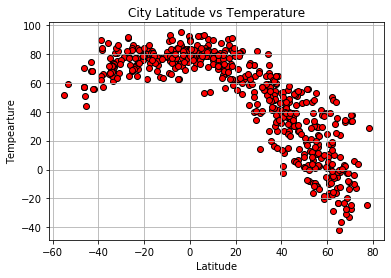

In [29]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors = 'Black', facecolors = 'red')
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Tempearture")
plt.grid()
plt.savefig("Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

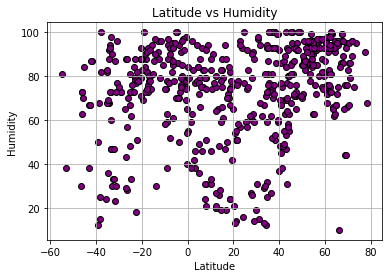

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = 'black', facecolors = 'purple')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

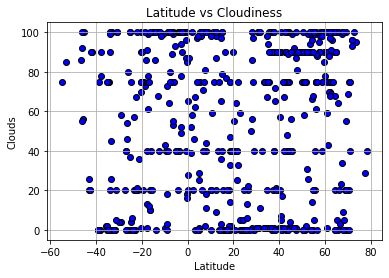

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = 'black', facecolors = 'blue')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid()
plt.savefig("Lat_vs_Cloud.png")

#### Latitude vs. Wind Speed Plot

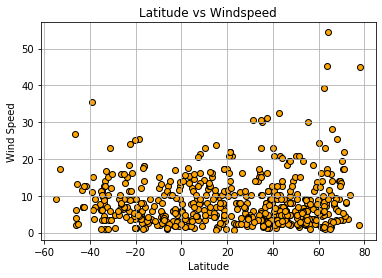

In [33]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = 'black', facecolors = 'orange')
plt.title("Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Lat_vs_Wind.png")